# The Show - Genre

## Data to Gather
1. Get top tracks from the Billboard Charts
2. Get genrea for each top tracks using Spptofy's API

## Visulizations
- Number of songs in top 100 by Genre [Stack bar/line graph] per year/decade



In [229]:
import pandas as pd
import numpy as np
import os
import kaggle
import glob
from time import sleep
import matplotlib.pyplot as plt
import seaborn as sns

### Get data from Kaggle
To download csv file using Python, you will need a [Kaggle API Key](https://www.kaggle.com/docs/api). 

Make sure to save the API key in 'C:\Users\USER_NAME.kaggle' directory.

In [2]:
kaggle.api.authenticate()

In [3]:
kaggle.api.dataset_download_files('theoverman/the-spotify-hit-predictor-dataset', 'spotify_hit_data', unzip=True)

### Set up directory

In [4]:
ROOT = os.getcwd()
print(f"Root Directory: {ROOT}")

SPOTIFY_HIT_DIR = os.path.join(ROOT, 'spotify_hit_data')
print(f"Spotify Hit Directory: {SPOTIFY_HIT_DIR}")

Root Directory: C:\Users\Nicholas\Desktop\Masters - Classes\MSDS455\MSDS455-The_Show
Spotify Hit Directory: C:\Users\Nicholas\Desktop\Masters - Classes\MSDS455\MSDS455-The_Show\spotify_hit_data


### Read into pandas data frame

Use 2010s data

In [5]:
src_files = glob.glob(os.path.join(SPOTIFY_HIT_DIR, '*.csv'))
src_files

['C:\\Users\\Nicholas\\Desktop\\Masters - Classes\\MSDS455\\MSDS455-The_Show\\spotify_hit_data\\dataset-of-00s.csv',
 'C:\\Users\\Nicholas\\Desktop\\Masters - Classes\\MSDS455\\MSDS455-The_Show\\spotify_hit_data\\dataset-of-10s.csv',
 'C:\\Users\\Nicholas\\Desktop\\Masters - Classes\\MSDS455\\MSDS455-The_Show\\spotify_hit_data\\dataset-of-60s.csv',
 'C:\\Users\\Nicholas\\Desktop\\Masters - Classes\\MSDS455\\MSDS455-The_Show\\spotify_hit_data\\dataset-of-70s.csv',
 'C:\\Users\\Nicholas\\Desktop\\Masters - Classes\\MSDS455\\MSDS455-The_Show\\spotify_hit_data\\dataset-of-80s.csv',
 'C:\\Users\\Nicholas\\Desktop\\Masters - Classes\\MSDS455\\MSDS455-The_Show\\spotify_hit_data\\dataset-of-90s.csv']

In [6]:
spotify_hit_df = pd.read_csv(src_files[1])
print(len(spotify_hit_df))
spotify_hit_df.head()

6398


,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


### EDA

In [7]:
spotify_hit_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6.398000e+03,6398.000000,6398.000000,6398.000000,6398.000000
mean,0.568163,0.667756,5.283526,-7.589796,0.645514,0.098018,0.216928,0.165293,0.196700,0.443734,122.353871,2.367042e+05,3.930916,41.028399,10.316505,0.500000
std,0.191103,0.240721,3.606216,5.234592,0.478395,0.097224,0.296835,0.318736,0.166148,0.245776,29.847389,8.563698e+04,0.377469,19.568827,3.776011,0.500039
min,0.062200,0.000251,0.000000,-46.655000,0.000000,0.022500,0.000000,0.000000,0.016700,0.000000,39.369000,2.985300e+04,0.000000,0.000000,2.000000,0.000000
25%,0.447000,0.533000,2.000000,-8.425000,0.000000,0.038825,0.008533,0.000000,0.096800,0.240000,98.091250,1.932068e+05,4.000000,28.059135,8.000000,0.000000
50%,0.588000,0.712500,5.000000,-6.096500,1.000000,0.057200,0.067050,0.000017,0.126000,0.434000,121.070000,2.212465e+05,4.000000,36.265365,10.000000,0.500000
75%,0.710000,0.857000,8.000000,-4.601250,1.000000,0.112000,0.311000,0.057650,0.249000,0.628000,141.085000,2.593165e+05,4.000000,48.292538,12.000000,1.000000
max,0.981000,0.999000,11.000000,-0.149000,1.000000,0.956000,0.996000,0.995000,0.982000,0.976000,210.977000,1.734201e+06,5.000000,213.154990,88.000000,1.000000


In [8]:
spotify_hit_df.dtypes

track                object
artist               object
uri                  object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
chorus_hit          float64
sections              int64
target                int64
dtype: object

In [9]:
# Check for Nulls
print(spotify_hit_df.isnull().sum())

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64


In [10]:
# Unique tracks
print(f"Number of unique tracks: {len(spotify_hit_df['track'].unique())}")

Number of unique tracks: 5966


### Clean data

In [11]:
spotify_hit_df['track_id'] = spotify_hit_df['uri'].str.split(':').str[2]
spotify_hit_df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,track_id
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1,2ZyuwVvV6Z3XJaXIFbspeE
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0,61APOtq25SCMuK0V5w2Kgp
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1,2JqnpexlO9dmvjUMCaLCLJ
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0,0cjfLhk8WJ3etPTCseKXtk
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1,1lItf5ZXJc1by9SbPeljFd


## Spotify API
- [Spotipy Documentation](https://spotipy.readthedocs.io/en/2.22.1/)

In [12]:
import json
import requests
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import config
import spotipy.util as util

In [114]:
client_id = config.client_id
client_secret = config.client_secret
username = config.username

redirect_uri = 'http://localhost:7777/callback'
# scope = 'user-top-read'

auth_token = util.prompt_for_user_token(username=username, 
#                                    scope=scope, 
                                   client_id=client_id,   
                                   client_secret=client_secret,     
                                   redirect_uri=redirect_uri)

In [115]:
trak_id_ls = spotify_hit_df['track_id'].tolist()
trak_id_ls[:5]

['2ZyuwVvV6Z3XJaXIFbspeE',
 '61APOtq25SCMuK0V5w2Kgp',
 '2JqnpexlO9dmvjUMCaLCLJ',
 '0cjfLhk8WJ3etPTCseKXtk',
 '1lItf5ZXJc1by9SbPeljFd']

In [116]:
# function to divide a list of uris (or ids) into chuncks of 50.
chunker = lambda y, x: [y[i : i + x] for i in range(0, len(y), x)]

# using the function
track_chunks = chunker(trak_id_ls, 50)

In [117]:
track_chunks[0]

['2ZyuwVvV6Z3XJaXIFbspeE',
 '61APOtq25SCMuK0V5w2Kgp',
 '2JqnpexlO9dmvjUMCaLCLJ',
 '0cjfLhk8WJ3etPTCseKXtk',
 '1lItf5ZXJc1by9SbPeljFd',
 '0qwcGscxUHGZTgq0zcaqk1',
 '75BGF4LC7AOLFfxn6ukZDH',
 '0flKDWZq11997Fb2ptkQvu',
 '7LBa0KNFR8IY3g7LOfXqu8',
 '70tFuqBcduJv15bEnOPRTh',
 '5Z19ylxppfnfdP4JH0u8oj',
 '2lJ4d8MCT6ZlDRHKJ1br14',
 '5Jd78KUwqhZcY5msCpsDLw',
 '6BDtTzjbJ5kKKSWcJT8MlX',
 '1hW21b9IQeETvRqMwnn2F7',
 '0wwPcA6wtMf6HUMpIRdeP7',
 '2Vevs2eAQNNb7NTpKj5kqA',
 '0iSaO7CfL9NgXdM8Meu2ul',
 '3stOygN0I7CIvkEB2LJGbv',
 '2hLhiONy3FcndFJc2CiC2e',
 '7GI1Weh21oGJYeSbrtOyR1',
 '1DV7nyw8OigFfEiJ3yEFj6',
 '6plKFdrBnKF0y3CRuceTDh',
 '5tf1VVWniHgryyumXyJM7w',
 '4gW4lIdFDob87TaoyREAHu',
 '5feuZknKlJYGMPvWvKrpwt',
 '774fmDmDlvsKYdcdBnjp1Z',
 '23puVz6Rhiq8Wax9KxnZtW',
 '1dXUWskP4zy7Inqpfy5hf6',
 '7iaw359G2XT14uTfV9feip',
 '0ek2PwrDkUWRqoaTq6WKDj',
 '3XF5xLJHOQQRbWya6hBp7d',
 '3OtMnyUaiipcAT23A8liyi',
 '1Vot6YSxInL52SGTN0XN9n',
 '4Hl8ohhuAt8AvjIGsyfuli',
 '1gv4xPanImH17bKZ9rOveR',
 '79dlQxvdsCDApoM8XChkpy',
 

In [118]:
track_data = []

for track in track_chunks:
    base_url = 'https://api.spotify.com/v1/tracks?ids='

    #2. Authentication
    #3. Parameters -- would be stored with authentication
    headers = {
        "Authorization": f"Bearer {auth_token}"
    }

    #4. Create an empty list
    r = requests.get(base_url+",".join(track), headers=headers)
    track_data.append(json.loads(r.text))
    sleep(3)

len(track_data)

128

In [119]:
# Get album release date
album_release_ls = []

# Get artist ID
artist_ids = []

for i in range(0, len(track_data)):
    for x in range(0, len(track_data[i]['tracks'])):
        album_release_ls.append(track_data[i]['tracks'][x]['album']['release_date'])
        artist_ids.append(track_data[i]['tracks'][x]['artists'][0]['id'])

display(len(album_release_ls))
display(len(artist_ids))

6398

6398

In [120]:
album_release_ls[:5]

['2015-11-13', '2012-06-12', '2018-09-07', '2018-02-02', '2016-09-30']

In [121]:
artist_ids[:5]

['2wUjUUtkb5lvLKcGKsKqsR',
 '42kHi9ZIpRGtgjP8ZB4jsi',
 '25u4wHJWxCA9vO0CzxAbK7',
 '6c1pBXHYjFcGQQNO5MMsdd',
 '7nKeLE1toRtW4M279iS26h']

### Get Artist data fro Genre

In [122]:
# using the function
artist_chunks = chunker(artist_ids, 50)

In [123]:
artist_data = []

for artist in artist_chunks:
    base_url = 'https://api.spotify.com/v1/artists?ids='

    #2. Authentication
    #3. Parameters -- would be stored with authentication
    headers = {
        "Authorization": f"Bearer {auth_token}"
    }

    #4. Create an empty list
    r = requests.get(base_url+",".join(artist), headers=headers)
    artist_data.append(json.loads(r.text))
    sleep(3)
    
len(artist_data)

128

In [128]:
artist_data[0]['artists'][0]['genres'][0]

'canadian contemporary r&b'

In [137]:
genre_ls = []

for i in range(0, len(artist_data)):
    for x in range(0, len(artist_data[i]['artists'])):
        if len(artist_data[i]['artists'][x]['genres']) == 0:
            genre_ls.append("No Genre Listed")
        else:
            genre_ls.append(artist_data[i]['artists'][x]['genres'][0])
        
len(genre_ls)

6398

### Join data back to main table

In [138]:
spotify_hit_df['album_release'] = album_release_ls
spotify_hit_df['genre'] = genre_ls

spotify_hit_df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,track_id,album_release,genre
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,...,0.706,108.029,188493,4,41.18681,10,1,2ZyuwVvV6Z3XJaXIFbspeE,2015-11-13,canadian contemporary r&b
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,...,0.250,155.489,176880,3,33.18083,9,0,61APOtq25SCMuK0V5w2Kgp,2012-06-12,exotica
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,...,0.274,172.065,205463,4,44.89147,9,1,2JqnpexlO9dmvjUMCaLCLJ,2018-09-07,danish pop
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,...,0.291,91.837,193043,4,29.52521,7,0,0cjfLhk8WJ3etPTCseKXtk,2018-02-02,brostep
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,...,0.780,160.517,144244,4,24.99199,8,1,1lItf5ZXJc1by9SbPeljFd,2016-09-30,viral trap


## Genre popularity over the years

In [148]:

pd.set_option("display.max_rows", None)
spotify_hit_df['genre'].value_counts()

contemporary country               517
dance pop                          324
pop                                273
atl hip hop                        211
hip hop                            119
No Genre Listed                    110
canadian hip hop                    94
art pop                             80
alternative metal                   76
melodic rap                         62
r&b                                 59
classic oklahoma country            55
conscious hip hop                   51
chicago rap                         51
glee club                           50
canadian pop                        49
desi pop                            44
afrobeats                           44
pop rap                             43
desi hip hop                        42
ambient worship                     42
brostep                             41
canadian contemporary r&b           40
edm                                 40
bebop                               39
dfw rap                  

In [142]:
len(spotify_hit_df['genre'].unique().tolist())

719

In [143]:
spotify_hit_df['genre'].unique()

array(['canadian contemporary r&b', 'exotica', 'danish pop', 'brostep',
       'viral trap', 'canadian pop', 'alternative metal', 'atl hip hop',
       'austrian metal', 'detroit hip hop', 'contemporary country',
       'downtempo', 'easy listening', 'dark hardcore', 'canadian hip hop',
       'r&b', 'san diego rap', 'banjo', 'acoustic guitar cover',
       'acoustic pop', 'deep euro house', 'bedroom pop',
       'alternative rock', 'cyber metal', 'atmosphere', 'country road',
       'hip hop', 'background music', 'art pop', 'pop',
       'brutal death metal', 'dance pop', 'trap', 'future rock',
       'boston hip hop', 'No Genre Listed', 'electro swing',
       'finnish death metal', 'emo rap', 'art punk', 'swiss metal',
       'birmingham metal', 'romanian house', 'electropop', 'afrobeats',
       'black metal', 'chicago rap', 'banda', 'classic oklahoma country',
       'nederpop', 'pet calming', 'alternative roots rock', 'dfw rap',
       'future bass', 'ballet class', 'anthem worsh

In [200]:
genre_pop_ls = ["dance pop",
"pop",
"art pop",
"canadian pop",
"desi pop",
"pop rap",
"hip pop",
"barbadian pop",
"electropop",
"neon pop punk",
"baroque pop",
"britpop",
"dream pop",
"indie pop rap",
"post-teen pop",
"acoustic pop",
"folk-pop",
"latin pop",
"candy pop",
"colombian pop",
"french folk pop",
"collage pop",
"french indie pop",
"pop r&b",
"canadian pop punk",
"k-pop",
"australian pop",
"dutch pop",
"german pop",
"bubblegum pop",
"metropopolis",
"country pop",
"electropowerpop",
"chamber pop",
"bedroom pop",
"puerto rican pop",
"bitpop",
"alternative pop rock",
"experimental pop",
"danish pop",
"pop soul",
"bow pop",
"power pop",
"pop dance",
"chicago pop punk",
"australian electropop",
"viral pop",
"classic pakistani pop",
"vintage dutch pop",
"electro-pop francais",
"channel pop",
"nederpop",
"pop punk",
"romanian pop",
"social media pop",
"belgian pop",
"austrian pop",
"alternative pop",
"czech pop",
"israeli pop",
"boy pop",
"canadian electropop",
"mandopop",
"australian alternative pop",
"indie dream pop",
"teen pop",
"classic swedish pop",
"classic city pop",
"indie poptimism",
"brill building pop",
"finnish pop",
"panamanian pop",
"nyc pop"]

genre_hiphop_ls = ["atl hip hop",
"hip hop",
"canadian hip hop",
"conscious hip hop",
"desi hip hop",
"detroit hip hop",
"east coast hip hop",
"boston hip hop",
"instrumental hip hop",
"alternative hip hop",
"latin hip hop",
"australian hip hop",
"christian hip hop",
"memphis hip hop",
"abstract hip hop",
"ohio hip hop",
"lgbtq+ hip hop",
"north carolina hip hop",
"bronx hip hop",
"experimental hip hop",
"kentucky hip hop",
"hawaiian hip hop",
"drumless hip hop",
"southern hip hop",
"miami hip hop",
"asian american hip hop",
"arkansas hip hop",
"french hip hop",
"australian underground hip hop",
"german hip hop",
"ghanaian hip hop",
"deep german hip hop",
"maine hip hop",
"finnish hip hop",
"deep underground hip hop",
"kansas city hip hop"]

genre_rock_ls = ["alternative rock",
"modern rock",
"american post-rock",
"idol rock",
"modern alternative rock",
"piano rock",
"experimental rock",
"indie rock",
"christian alternative rock",
"dutch rock",
"celtic rock",
"modern folk rock",
"classic garage rock",
"future rock",
"modern blues rock",
"english indie rock",
"australian alternative rock",
"canadian rock",
"dance rock",
"album rock",
"british post-rock",
"alternative pop rock",
"irish rock",
"danish alternative rock",
"german hard rock",
"atmospheric post-rock",
"french rock",
"australian post-rock",
"boston rock",
"modern country rock",
"alternative roots rock",
"dark rock",
"southern rock",
"blues-rock guitar",
"christian hard rock",
"instrumental math rock",
"german post-rock",
"swedish alternative rock",
"heartland rock",
"german indie rock",
"deep classic garage rock",
"finnish alternative rock",
"deep christian rock",
"garage rock",
"austin rock",
"classic rock",
"comedy rock",
"medieval rock",
"acoustic rock",
"chinese indie rock",
"belgian rock",
"modern southern rock"]


genre_rb_ls = ["r&b",
"canadian contemporary r&b",
"contemporary r&b",
"pop r&b",
"alternative r&b",
"experimental r&b",
"chill r&b",
"uk contemporary r&b",
"british soul",
"neo soul",
"chicago soul",
"pop soul",
"indie soul",
"bedroom soul",
"vapor soul"]

genre_rap_ls = ["melodic rap",
"chicago rap",
"pop rap",
"dfw rap",
"emo rap",
"dirty south rap",
"cali rap",
"gangster rap",
"san diego rap",
"baton rouge rap",
"indie pop rap",
"new jersey rap",
"country rap",
"rap",
"houston rap",
"bass trap",
"comedy rap",
"florida rap",
"cloud rap",
"viral trap",
"trap",
"scam rap",
"battle rap",
"nyc rap",
"gospel rap",
"k-rap",
"trap queen",
"alabama rap",
"upstate ny rap",
"german alternative rap",
"new orleans rap"]

genre_country_ls = ["contemporary country",
"classic oklahoma country",
"australian country",
"classic texas country",
"arkansas country",
"country rap",
"alternative country",
"country road",
"country pop",
"country dawn",
"modern country rock",
"country gospel",
"alberta country",
"country"]

genre_folk_ls = ["folk-pop",
"french folk pop",
"modern folk rock",
"australian indie folk",
"folk punk",
"ambient folk",
"american folk revival",
"british folk",
"appalachian folk",
"folk metal",
"canadian folk",
"rune folk",
"folk",
"german indie folk",
"indie folk",
"arab folk"]

genre_metal_ls = ["alternative metal",
"death metal",
"german metal",
"black metal",
"atmospheric black metal",
"christian metal",
"doom metal",
"gothenburg metal",
"birmingham metal",
"greek metal",
"brutal death metal",
"chilean metal",
"austrian metal",
"cyber metal",
"danish metal",
"comic metal",
"avant-garde metal",
"belgian metal",
"french death metal",
"australian metal",
"chinese metal",
"finnish death metal",
"austrian black metal",
"autonomous black metal",
"finnish heavy metal",
"avant-garde black metal",
"alabama metal",
"chilean black metal",
"french metal",
"danish death metal",
"german heavy metal",
"finnish black metal",
"dark black metal",
"symphonic black metal",
"brazilian doom metal",
"atmospheric post-metal",
"finnish doom metal",
"boston metal",
"indonesian death metal",
"brazilian death metal",
"canadian death metal",
"ambient black metal",
"folk metal",
"black speed metal",
"swiss metal",
"american metalcore",
"brazilian black metal",
"metallic hardcore",
"fantasy metal",
"grisly death metal",
"experimental black metal",
"brazilian metal",
"british black metal",
"australian metalcore",
"gothic metal",
"irish metal",
"greek black metal",
"colombian black metal",
"atlanta metal",
"australian thrash metal",
"proto-metal",
"florida death metal",
"drone metal",
"german metalcore",
"lovecraftian metal",
"german thrash metal",
"grim death metal",
"canadian metalcore",
"melodic metalcore",
"russian death metal",
"gothic symphonic metal",
"norwegian doom metal",
"italian death metal",
"glam metal"]

genre_punk_ls = ["cyberpunk",
"neon pop punk",
"danspunk",
"chicago punk",
"anarcho-punk",
"acoustic punk",
"boston punk",
"crust punk",
"canadian pop punk",
"folk punk",
"dark post-punk",
"art punk",
"canadian punk",
"chicago pop punk",
"elektropunk",
"pop punk",
"dance-punk",
"french punk",
"australian garage punk",
"christian punk",
"modern ska punk",
"dreampunk",
"german punk",
"early french punk",
"american post-punk"]

# genre_classical_ls = ["21st century classical",
# "baltic classical",
# "american contemporary classical",
# "classical",
# "chinese classical",
# "african-american classical",
# "classical countertenor",
# "american modern classical",
# "neo-classical",
# "ukrainian classical piano",
# "british contemporary classical",
# "early modern classical",
# "caucasian classical",
# "classical piano",
# "austrian contemporary classical",
# "classical saxophone",
# "danish contemporary classical",
# "canadian classical",
# "contemporary classical"]

# genre_jazz_ls = ["contemporary vocal jazz",
# "contemporary jazz",
# "acid jazz",
# "ecm-style jazz",
# "cool jazz",
# "avant-garde jazz",
# "german jazz",
# "dark jazz",
# "jazz saxophone",
# "jazz trio",
# "jazz piano",
# "jazztronica",
# "norwegian jazz",
# "canadian modern jazz",
# "electro jazz",
# "british jazz",
# "jazz guitar",
# "french jazz",
# "dutch jazz",
# "norwegian contemporary jazz"]

# genre_electronic_ls = ["canadian electronic",
# "electronica",
# "uk experimental electronic",
# "bulgarian electronic",
# "bristol electronic",
# "vintage french electronic",
# "dutch experimental electronic",
# "frankfurt electronic"]

In [216]:
genres_simple = []

for genre in spotify_hit_df['genre']:
    if genre in genre_pop_ls:
        genres_simple.append("pop")
    elif genre in genre_hiphop_ls:
        genres_simple.append("hip hop")
    elif genre in genre_rock_ls:
        genres_simple.append("rock")
    elif genre in genre_rb_ls:
        genres_simple.append("r&b/soul")
    elif genre in genre_rap_ls:
        genres_simple.append("rap")
    elif genre in genre_country_ls:
        genres_simple.append("country")
#     elif genre in genre_folk_ls:
#         genres_simple.append("folk")
    elif genre in genre_metal_ls:
        genres_simple.append("metal")
    elif genre in genre_punk_ls:
        genres_simple.append("punk")
#     elif genre in genre_classical_ls:
#         genres_simple.append("classical")
#     elif genre in genre_jazz_ls:
#         genres_simple.append("jazz")
#     elif genre in genre_electronic_ls:
#         genres_simple.append("electronic")
    else:
        genres_simple.append("other")
        
genres_simple[:10]

['r&b/soul',
 'other',
 'pop',
 'other',
 'rap',
 'pop',
 'metal',
 'hip hop',
 'metal',
 'hip hop']

In [217]:
spotify_hit_df['simplified_genres'] = genres_simple

spotify_hit_df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,duration_ms,time_signature,chorus_hit,sections,target,track_id,album_release,genre,simplified_genres,release_year
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,...,188493,4,41.18681,10,1,2ZyuwVvV6Z3XJaXIFbspeE,2015-11-13,canadian contemporary r&b,r&b/soul,2015
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,...,176880,3,33.18083,9,0,61APOtq25SCMuK0V5w2Kgp,2012-06-12,exotica,other,2012
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,...,205463,4,44.89147,9,1,2JqnpexlO9dmvjUMCaLCLJ,2018-09-07,danish pop,pop,2018
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,...,193043,4,29.52521,7,0,0cjfLhk8WJ3etPTCseKXtk,2018-02-02,brostep,other,2018
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,...,144244,4,24.99199,8,1,1lItf5ZXJc1by9SbPeljFd,2016-09-30,viral trap,rap,2016


In [218]:
spotify_hit_df['simplified_genres'].value_counts()

other       2364
pop         1213
hip hop      695
country      641
metal        639
rap          343
rock         246
r&b/soul     155
punk         102
Name: simplified_genres, dtype: int64

## Get release year

In [219]:
spotify_hit_df['release_year'] = spotify_hit_df['album_release'].str[:4]
spotify_hit_df['release_year'] = spotify_hit_df['release_year'].astype(str).astype(int)
spotify_hit_df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,duration_ms,time_signature,chorus_hit,sections,target,track_id,album_release,genre,simplified_genres,release_year
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,...,188493,4,41.18681,10,1,2ZyuwVvV6Z3XJaXIFbspeE,2015-11-13,canadian contemporary r&b,r&b/soul,2015
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,...,176880,3,33.18083,9,0,61APOtq25SCMuK0V5w2Kgp,2012-06-12,exotica,other,2012
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,...,205463,4,44.89147,9,1,2JqnpexlO9dmvjUMCaLCLJ,2018-09-07,danish pop,pop,2018
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,...,193043,4,29.52521,7,0,0cjfLhk8WJ3etPTCseKXtk,2018-02-02,brostep,other,2018
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,...,144244,4,24.99199,8,1,1lItf5ZXJc1by9SbPeljFd,2016-09-30,viral trap,rap,2016


In [220]:
spotify_hit_df['release_year'].value_counts()

2019    1001
2018     802
2017     791
2015     621
2016     581
2014     552
2011     486
2013     480
2012     436
2010     427
2009     138
2008      23
0         10
1963       6
1984       4
1997       3
2006       3
1962       3
1947       2
1989       2
1986       2
1994       2
1964       2
1987       2
1985       2
1965       2
1992       2
1988       2
1982       1
1959       1
1981       1
1951       1
1995       1
2002       1
2021       1
2004       1
2005       1
1975       1
1958       1
Name: release_year, dtype: int64

### Get data for 2010+

In [221]:
spotify_2010_df = spotify_hit_df[spotify_hit_df['release_year'] >= 2010]
spotify_2010_df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,duration_ms,time_signature,chorus_hit,sections,target,track_id,album_release,genre,simplified_genres,release_year
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,...,188493,4,41.18681,10,1,2ZyuwVvV6Z3XJaXIFbspeE,2015-11-13,canadian contemporary r&b,r&b/soul,2015
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,...,176880,3,33.18083,9,0,61APOtq25SCMuK0V5w2Kgp,2012-06-12,exotica,other,2012
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,...,205463,4,44.89147,9,1,2JqnpexlO9dmvjUMCaLCLJ,2018-09-07,danish pop,pop,2018
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,...,193043,4,29.52521,7,0,0cjfLhk8WJ3etPTCseKXtk,2018-02-02,brostep,other,2018
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,...,144244,4,24.99199,8,1,1lItf5ZXJc1by9SbPeljFd,2016-09-30,viral trap,rap,2016


In [223]:
genre_year_df = spotify_2010_df[['simplified_genres', 'release_year']]
genre_year_df.head()

,simplified_genres,release_year
0,r&b/soul,2015
1,other,2012
2,pop,2018
3,other,2018
4,rap,2016


In [224]:
genre_year_df = genre_year_df[genre_year_df['simplified_genres'] != 'other']
genre_year_df = genre_year_df[genre_year_df['release_year'] < 2020]
genre_year_df.head()

,simplified_genres,release_year
0,r&b/soul,2015
2,pop,2018
4,rap,2016
5,pop,2013
6,metal,2014


In [225]:
genre_counts = genre_year_df.groupby(['release_year', 'simplified_genres']).size().reset_index(name='count')
genre_counts.head()

,release_year,simplified_genres,count
0,2010,country,63
1,2010,hip hop,40
2,2010,metal,18
3,2010,pop,115
4,2010,punk,8


In [239]:
col_diverging = ['#7a0177','#c51b8a','#f768a1','#fa9fb5','#99d8c9','#66c2a4','#2ca25f','#006d2c']

sns.color_palette(col_diverging)

[(0.47843137254901963, 0.00392156862745098, 0.4666666666666667),
 (0.7725490196078432, 0.10588235294117647, 0.5411764705882353),
 (0.9686274509803922, 0.40784313725490196, 0.6313725490196078),
 (0.9803921568627451, 0.6235294117647059, 0.7098039215686275),
 (0.6, 0.8470588235294118, 0.788235294117647),
 (0.4, 0.7607843137254902, 0.6431372549019608),
 (0.17254901960784313, 0.6352941176470588, 0.37254901960784315),
 (0.0, 0.42745098039215684, 0.17254901960784313)]

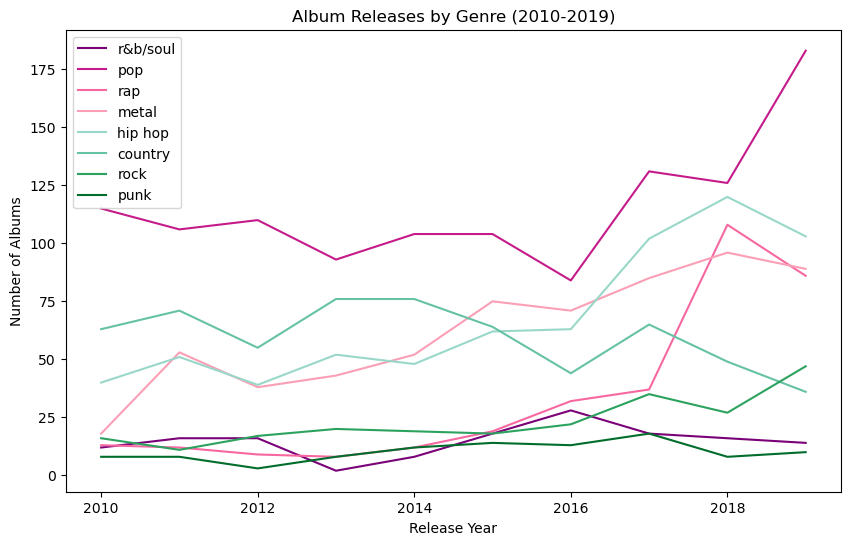

In [241]:
# Create a line plot
plt.figure(figsize=(10, 6))
for i, genre in enumerate(genre_year_df['simplified_genres'].unique().tolist()):
    genre_data = genre_counts[genre_counts['simplified_genres'] == genre]
    plt.plot(genre_data['release_year'], genre_data['count'], label=genre, color=col_diverging[i])

# Customize the plot
plt.xlabel('Release Year')
plt.ylabel('Number of Albums')
plt.title('Album Releases by Genre (2010-2019)')
plt.legend()

# Save plt as png file with transparent background
plt.savefig('2010s_Genre.png', transparent=True)

# Display the plot
plt.show()

## Track attributes for specific genre
- number of albums each year per genre
- % of songs released vs top pop songs

## Get total ablums released in 2022 and their genres
Data is from [Discog](https://www.discogs.com/search/?decade=2020&year=2022&country_exact=US)

In [ ]:
discog_2022 = pd.read_csv("2022_AlbumRelease_Genres.csv")
discog_2022